In [30]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from collections import Counter


In [2]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [4]:
##import dataset
df_census = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/relabeled_census.csv', encoding = "ISO-8859-1")
df_broadband = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/fcc_census.csv', encoding = 'ISO-8859-1')

# Broadband Data EDA



In [5]:
df_broadband.head()

,tract_geoid,All_Provider_Count,All_Providers,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,total_pop2,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
0,1001020100,7,"{56004, 58757, 54694, 67056, 59349, 55262, 58623}",3.0,4,0.0,5.0,4.0,0.0,3.0,2.0,0.0,3.0,1.0,"Census Tract 201, Autauga County, Alabama",1993.0,38.9,36.8,40.1,1.0,1.0,20100.0,58.9,60208.0,709.0,2.81,3.16,97.9,85.9,100.0,1993.0,136100.0,83.2,1.3,7.6,0.0,0.1,0.0,0.0,7.7,54.5,16.658304,27.135299,60.922147,74.047955,0.00000,74.047955,66.008463,8.180536,7.616361,7.616361,0.423131,0.0,1.692525,24.259520,81.523272,0.00000,74.047955,7.475317,18.476728,1001020100,9817813,28435,3.791,0.011,52571.880770
1,1001020200,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",6.0,4,0.0,4.0,3.0,0.0,2.0,2.0,0.0,2.0,1.0,"Census Tract 202, Autauga County, Alabama",1959.0,41.3,34.1,44.6,1.0,1.0,20200.0,45.9,43958.0,688.0,2.54,3.56,96.8,89.2,100.0,1959.0,90500.0,38.3,1.5,57.0,0.0,0.0,0.0,0.3,2.9,64.9,19.133996,17.106201,45.117605,66.860465,0.00000,66.860465,57.848837,13.953488,9.011628,5.087209,0.000000,0.0,2.761628,30.377907,74.709302,0.00000,66.860465,7.848837,25.290698,1001020200,3325680,5669,1.284,0.002,152570.093458
2,1001020300,10,"{56004, 58757, 54694, 67056, 59349, 56888, 555...",6.0,4,0.0,4.0,3.0,0.0,2.0,2.0,0.0,2.0,1.0,"Census Tract 203, Autauga County, Alabama",3507.0,37.6,37.2,40.1,1.0,1.0,20300.0,61.7,55345.0,1360.0,2.58,3.12,98.7,94.6,100.0,3507.0,122600.0,65.2,6.6,24.4,0.0,0.9,0.1,0.0,2.7,41.1,17.251212,18.443114,53.053892,80.367647,0.00000,80.367647,67.205882,13.970588,12.058824,3.897059,1.102941,0.0,1.323529,18.308824,87.941176,0.00000,78.529412,9.411765,12.058824,1001020300,5349273,9054,2.065,0.003,169830.508475
3,1001020400,8,"{56004, 58757, 54694, 67056, 59349, 55514, 552...",4.0,4,0.0,5.0,3.0,0.0,3.0,2.0,0.0,2.0,1.0,"Census Tract 204, Autauga County, Alabama",3878.0,45.8,42.5,47.9,1.0,1.0,20400.0,53.5,59663.0,1675.0,2.32,2.78,99.3,93.3,100.0,3878.0,152700.0,89.7,1.1,5.6,0.8,0.3,0.0,0.0,2.6,38.1,4.641568,34.803922,69.642857,86.029851,0.41791,85.611940,69.014925,5.492537,15.820896,5.671642,0.000000,0.0,0.179104,13.791045,92.597015,0.41791,85.313433,6.865672,7.402985,1001020400,6384276,8408,2.465,0.003,157322.515213
4,1001020500,13,"{56004, 58757, 54694, 56170, 54860, 54927, 670...",9.0,4,0.0,5.0,4.0,0.0,3.0,2.0,0.0,3.0,1.0,"Census Tract 205, Autauga County, Alabama",10596.0,34.9,32.5,35.9,1.0,1.0,20500.0,61.1,66108.0,4483.0,2.32,2.95,98.2,94.3,100.0,10596.0,186900.0,70.9,4.4,18.2,0.0,3.6,0.0,0.5,2.4,45.2,15.162559,42.373380,74.219670,89.025206,0.00000,89.025206,72.518403,3.881329,16.506803,3.792104,0.000000,0.0,5.532010,5.442784,94.713362,0.00000,89.025206,5.688155,5.286638,1001020500,11408866,43534,4.405,0.017,240544.835414


In [6]:
# check is there any missing values in dataframe as a whole
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73056 entries, 0 to 73055
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tract_geoid                        73056 non-null  int64  
 1   All_Provider_Count                 73056 non-null  int64  
 2   All_Providers                      73056 non-null  object 
 3   Wired_Provider_Count               73056 non-null  float64
 4   Satellite_Provider_Count           73056 non-null  int64  
 5   Fixed_Wireless_Provider_Count      73056 non-null  float64
 6   All_Provider_Count_25              73056 non-null  float64
 7   All_Provider_Count_100             73056 non-null  float64
 8   Fixed_Wireless_Provider_Count_25   73056 non-null  float64
 9   Wired_Provider_Count_25            73056 non-null  float64
 10  Satellite_Provider_Count_25        73056 non-null  float64
 11  Fixed_Wireless_Provider_Count_100  73056 non-null  flo

## EDA - Missing Values


### 1.Broadband Merged Datasets

In [14]:
df_broadband.describe()

,tract_geoid,All_Provider_Count,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,total_pop2,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
count,7.305600e+04,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,73056.000000,72384.000000,72354.000000,72276.000000,73056.000000,73056.000000,73056.000000,72410.000000,72032.000000,73056.000000,72199.000000,72176.000000,72121.000000,72294.000000,72018.000000,73056.000000,7.108400e+04,72410.000000,72410.000000,72410.000000,72410.000000,72410.000000,72410.000000,72410.000000,72410.000000,72079.000000,72263.000000,72392.000000,72392.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,72227.000000,7.305600e+04,7.305600e+04,7.305600e+04,73056.000000,73056.000000,7.273900e+04
mean,2.782601e+10,10.593627,5.485655,3.983725,1.321863,5.053945,2.978140,0.652007,2.443167,1.989652,0.203269,2.290106,0.493977,4444.505516,39.617972,38.398322,40.818467,27.739816,85.940292,258659.790503,58.763500,67077.056558,1652.924442,2.635188,3.213078,95.180487,87.449733,99.044612,4444.505516,2.731591e+05,61.307520,16.684817,13.485574,0.756596,4.944753,0.153795,0.240539,2.426311,47.586658,14.648014,30.703402,63.676248,81.629190,0.377504,81.251686,64.815516,10.460352,14.478903,6.337191,0.976819,0.152107,3.164248,15.206562,89.406795,0.362539,80.511737,8.532518,10.593205,2.782601e+10,1.252538e+08,9.363781e+06,48.360763,3.615375,5.413830e+05
std,1.581010e+10,3.123510,2.709706,0.204783,1.442236,1.413354,1.199754,0.928827,0.982400,0.107113,0.481190,0.930517,0.499967,2349.023300,7.837908,8.010863,8.237439,15.785590,99.649681,349632.595711,10.848374,33459.198970,835.239400,0.503816,0.454706,6.371752,9.789080,2.902789,2349.023300,2.468632e+05,29.958653,21.459955,21.497805,4.623799,9.202511,1.066828,0.826616,2.509999,16.223727,11.591889,19.320797,16.045626,11.627314,0.785124,11.696798,12.990488,6.298312,6.164126,5.048969,1.759508,0.614259,3.431444,10.553196,7.937941,0.774684,12.006167,6.182440,7.937941,1.581010e+10,1.404352e+09,2.278485e+08,542.223513,87.972795,1.190919e+06
min,1.001020e+09,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.900000,5.100000,5.400000,1.000000,1.000000,100.000000,0.000000,2499.000000,0.000000,1.040000,1.670000,0.000000,0.000000,0.000000,0.000000,9.999000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001020e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.212708e+10,8.000000,4.000000,4.000000,0.000000,4.000000,2.000000,0.000000,2.000000,2

In [7]:
# Get the sum of missing values for each variable.
df_broadband.isnull().sum()

tract_geoid                   0
All_Provider_Count            0
All_Providers                 0
Wired_Provider_Count          0
Satellite_Provider_Count      0
                           ... 
ALAND                         0
AWATER                        0
ALAND_SQMI                    0
AWATER_SQMI                   0
population_density          317
Length: 66, dtype: int64

In [8]:
## To calculate the %of missing values for each variable
(
    ( 
        df_broadband.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(df_broadband)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
median_house_value,2.7
pct_health_ins_65+,1.4
median_income,1.4
pct_rent_burdened,1.3
pct_health_ins_children,1.3
ave_family_size,1.2
ave_household_size,1.2
pct_internet_broadband_fiber,1.1
pct_internet,1.1
pct_internet_broadband_any_type,1.1


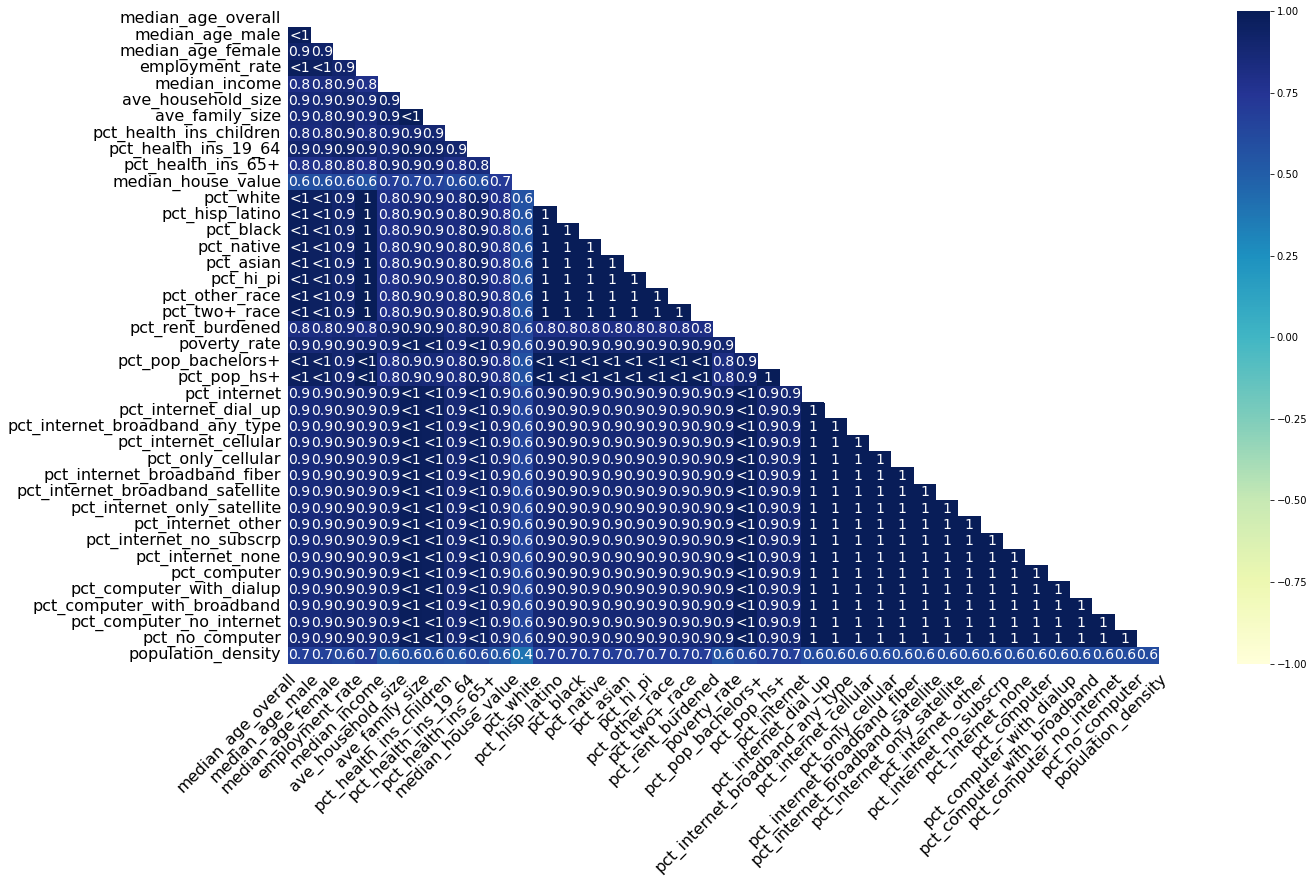

In [9]:
msno.heatmap(df_broadband, cmap='YlGnBu')

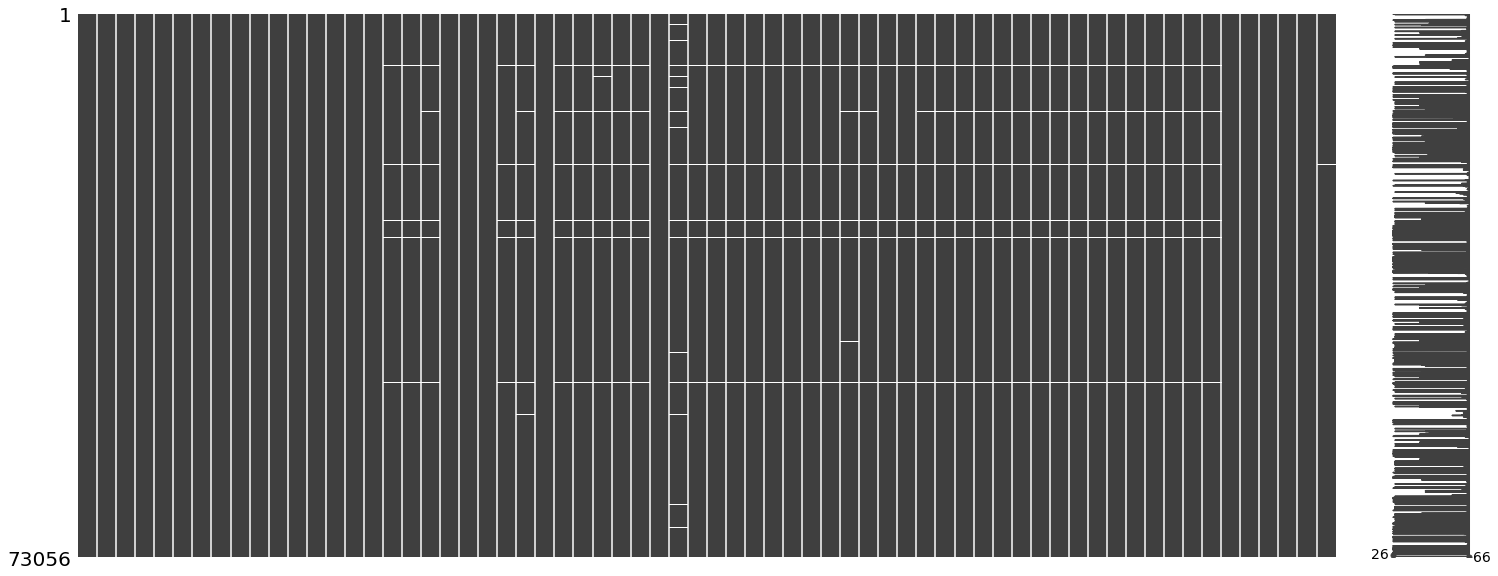

In [10]:
msno.matrix(df_broadband)

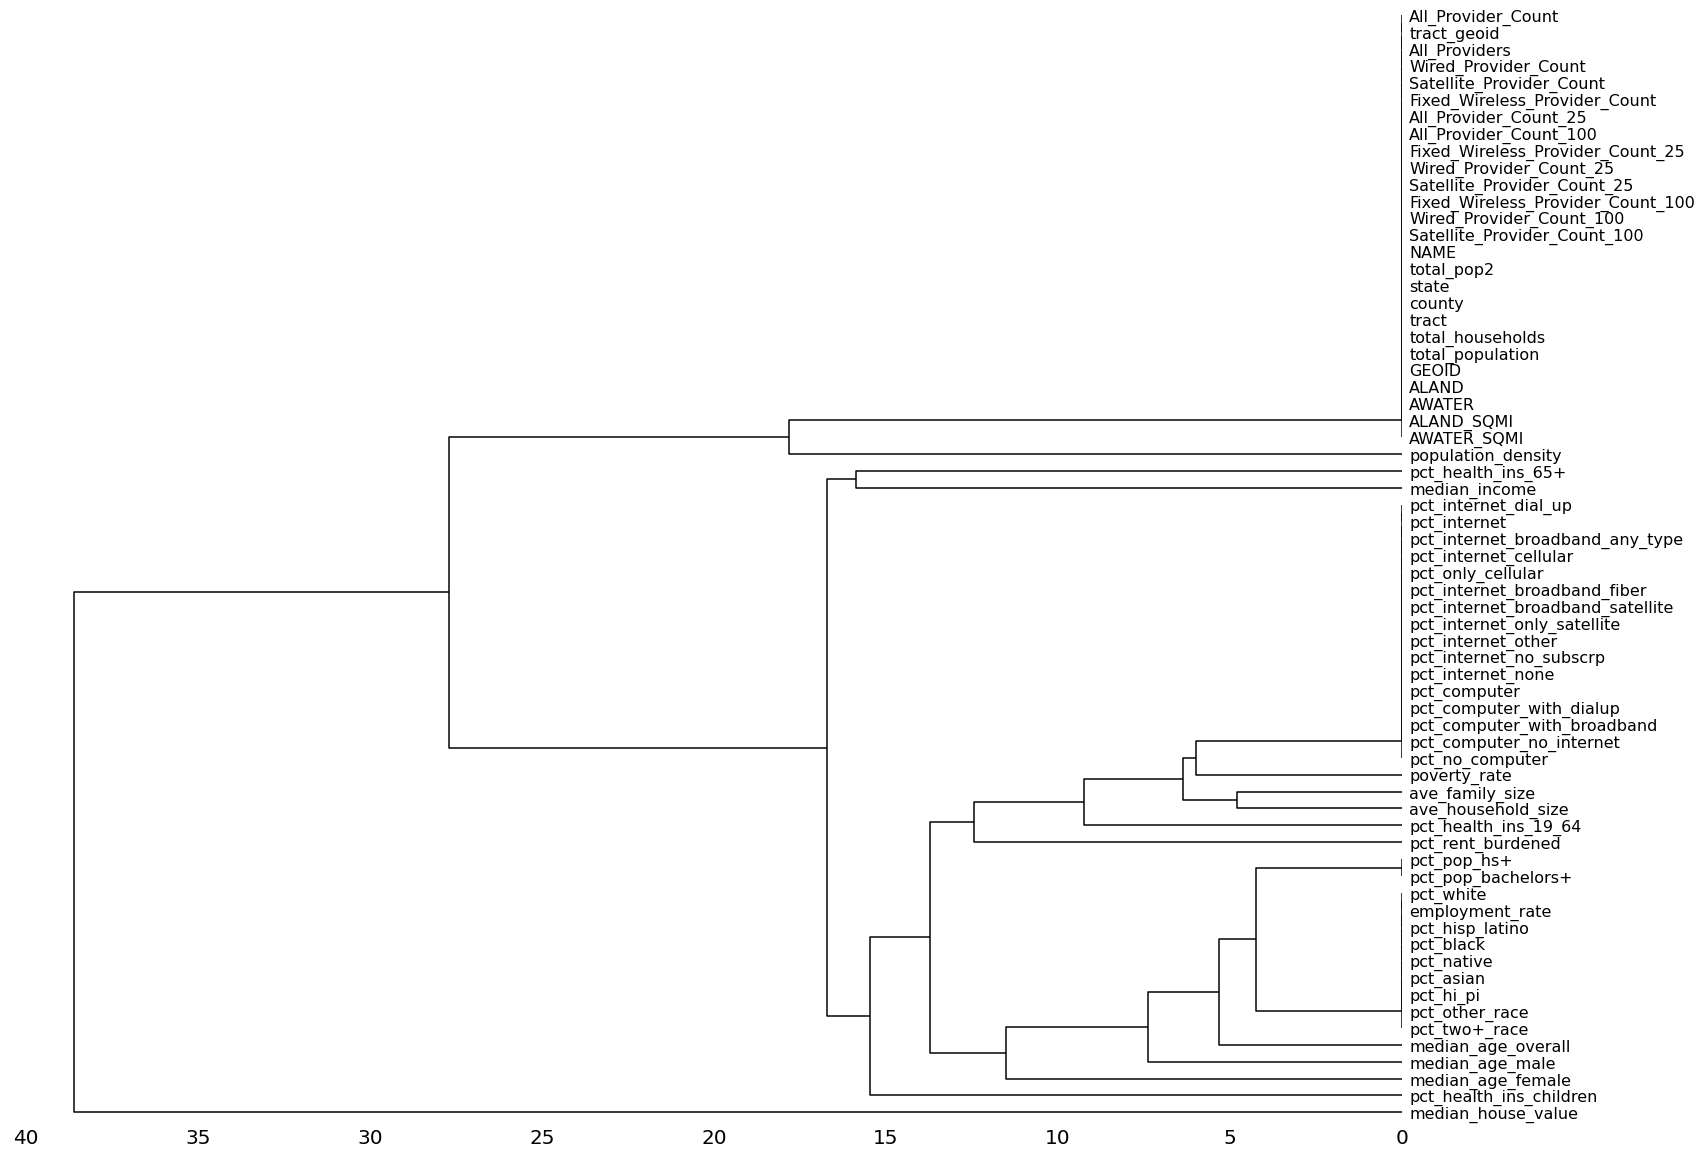

In [11]:
msno.dendrogram(df_broadband)


In [12]:
# To select only the rows with NaN values
df_missing = df_broadband[pd.isnull(df_broadband).any(axis=1)]
df_missing
## Notice that we have 9342 observations/rows that contain one or more missing values. Thats roughly 28.5% of data contains missing values
## We want to then look at if some states/counties have more missing values than others

,tract_geoid,All_Provider_Count,All_Providers,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,total_pop2,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
43,1003990000,2,"{56004, 56631}",1.0,1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,"Census Tract 9900, Baldwin County, Alabama",0.0,NaN,NaN,NaN,1.0,3.0,990000.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003990000,0,815342622,0.000,314.806,NaN
83,1015000700,9,"{56004, 54694, 67056, 59538, 59349, 56888, 555...",5.0,4,0.0,4.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,"Census Tract 7, Calhoun County, Alabama",2918.0,36.3,31.9,47.1,1.0,15.0,700.0,41.7,39524.0,1162.0,2.22,2.64,100.0,78.0,100.0,2918.0,NaN,45.7,5.2,37.9,0.0,0.8,0.0,0.7,9.7,45.9,27.933178,24.292683,59.317073,66.265060,0.0,66.265060,50.516351,12.994836,10.068847,7.401033,5.163511,0.000000,2.667814,31.067126,80.120482,0.0,64.888124,15.232358,19.879518,1015000700,45784584,107461,17.678,0.041,16506.392126
106,1015981901,6,"{56004, 54694, 67056, 59538, 59349, 55262}",2.0,4,0.0,4.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,"Census Tract 9819.01, Calhoun County, Alabama",0.0,NaN,NaN,NaN,1.0,15.0,981901.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015981901,62785038,137514,24.241,0.053,0.000000
107,1015981902,5,"{56004, 54694, 59538, 59349, 55262}",1.0,4,0.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,"Census Tract 9819.02, Calhoun County, Alabama",0.0,NaN,NaN,NaN,1.0,15.0,981902.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015981902,89734614,294152,34.647,0.114,0.000000
108,1015981903,4,"{56004, 59349, 54694, 55262}",0.0,4,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,"Census Tract 9819.03, Calhoun County, Alabama",0.0,NaN,NaN,NaN,1.0,15.0,981903.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015981903,36029495,1072,13.911,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72771,55133200801,12,"{55394, 56004, 54076, 54694, 54836, 56917, 670...",7.0,4,1.0,4.0,3.0,0.0,2.0,2.0,0.0,2.0,1.0,"Census Tract 2008.01, Waukesha County, Wisconsin",4596.0,44.6,44.3,45.0,55.0,133.0,200801.0,61.1,118092.0,1699.0,2.71,3.06,100.0,97.9,100.0,4596.0,341100.0,88.0,1.2,0.9,0.5,8.4,0.0,0.0,1.1,NaN,1.196693,67.672008,88.281495,91.642142,0.0,91.642142,71.924662,2.766333,18.716892,6.886404,0.000000,0.588582,1.648028,6.709829,96.998234,0.0,90.818128,6.180106,3.001766,55133200801,13727763,294533,5.300,0.114,86716.981132
72778,55133

In [15]:
## for each state, we look at how many datapoints are missing for each column
df_missing.set_index('state').isna().groupby(level=0).sum()

,tract_geoid,All_Provider_Count,All_Providers,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,total_pop2,median_age_overall,median_age_male,median_age_female,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,0,0,6,9,0,7,7,6,6,10,0,15,6,6,6,6,6,6,6,6,8,7,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,0,0,0,2
2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,2,0,2,2,1,1,1,0,7,0,0,0,0,0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,11,0,0,7,16,0,12,12,32,11,16,0,39,7,7,7,7,7,7,7,7,16,11,7,7,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,4,0,1,1,2,1,3,0,5,1,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,53,67,0,0,45,92,0,79,81,96,68,101,0,230,45,45,45,45,45,45,45,45,84,72,48,48,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,76,0,0,0,0,0,21
8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,10,0,0,7,14,0,15,16,15,11,17,0,26,7,7,7,7,7,7,7,7,19,13,7,7,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,7,0,0,5,10,0,9,9,8,8,10,0,16,5,5,5,5,5,5,5,5,10,8,5,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0,0,0,4
10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,0,0,4,4,0,4,4,4,4,4,0,5,4,4,4,4,4,4,4,4,7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,3
11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,3,0,1,2,1,0,1,0,5,0,0,0,0,0,0,0,0,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0


In [16]:
## what percentage of datapoints are missing by State
df_broadband.groupby('state').apply(lambda x: x.isnull().sum()/len(x)*100)


,tract_geoid,All_Provider_Count,All_Providers,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,total_pop2,median_age_overall,median_age_male,median_age_female,state,county,tract,employment_rate,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508044,0.508044,0.508044,0.0,0.0,0.0,0.508044,0.762066,0.0,0.592718,0.592718,0.508044,0.508044,0.846740,0.0,1.270110,0.508044,0.508044,0.508044,0.508044,0.508044,0.508044,0.508044,0.508044,0.677392,0.592718,0.508044,0.508044,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.592718,0.0,0.0,0.0,0.0,0.0,0.169348
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.598802,0.598802,0.598802,0.0,0.0,0.0,0.000000,1.197605,0.0,1.197605,1.197605,0.598802,0.598802,0.598802,0.0,4.191617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197605,0.000000,0.000000,0.000000,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.598802,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458716,0.458716,0.720839,0.0,0.0,0.0,0.458716,1.048493,0.0,0.786370,0.786370,2.096986,0.720839,1.048493,0.0,2.555701,0.458716,0.458716,0.458716,0.458716,0.458716,0.458716,0.458716,0.458716,1.048493,0.720839,0.458716,0.458716,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.786370,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145773,0.291545,0.145773,0.0,0.0,0.0,0.145773,0.583090,0.0,0.145773,0.145773,0.291545,0.145773,0.437318,0.0,0.728863,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.437318,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.145773,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608167,0.657813,0.831575,0.0,0.0,0.0,0.558521,1.141864,0.0,0.980514,1.005337,1.191510,0.843987,1.253568,0.0,2.854661,0.558521,0.558521,0.558521,0.558521,0.558521,0.558521,0.558521,0.558521,1.042572,0.893633,0.595755,0.595755,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.943279,0.0,0.0,0.0,0.0,0.0,0.260643
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.560448,0.560448,0.800641,0.0,0.0,0.0,0.560448,1.120897,0.0,1.200961,1.281025,1.200961,0.880705,1.361089,0.0,2.081665,0.560448,0.560448,0.560448,0.560448,0.560448,0.560448,0.560448,0.560448,1.521217,1.040833,0.560448,0.560448,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1.120897,1

## EDA - Outliers Exploration


### 1.Broadband Merged Datasets

In [17]:
numeric_feats = df_broadband.dtypes[df_broadband.dtypes != "object"].index
numeric_feats

Index(['tract_geoid', 'All_Provider_Count', 'Wired_Provider_Count',
       'Satellite_Provider_Count', 'Fixed_Wireless_Provider_Count',
       'All_Provider_Count_25', 'All_Provider_Count_100',
       'Fixed_Wireless_Provider_Count_25', 'Wired_Provider_Count_25',
       'Satellite_Provider_Count_25', 'Fixed_Wireless_Provider_Count_100',
       'Wired_Provider_Count_100', 'Satellite_Provider_Count_100',
       'total_pop2', 'median_age_overall', 'median_age_male',
       'median_age_female', 'state', 'county', 'tract', 'employment_rate',
       'median_income', 'total_households', 'ave_household_size',
       'ave_family_size', 'pct_health_ins_children', 'pct_health_ins_19_64',
       'pct_health_ins_65+', 'total_population', 'median_house_value',
       'pct_white', 'pct_hisp_latino', 'pct_black', 'pct_native', 'pct_asian',
       'pct_hi_pi', 'pct_other_race', 'pct_two+_race', 'pct_rent_burdened',
       'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet',
       'pct_

In [18]:
# define plot function, and in this function, we will calculate the skew of X and take the log1p of y
def plot_outlier(x,y):
    tmp=x.dropna()
    skew_value=skew(tmp)
    y=np.log1p(y)
    print('sample lengh: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(15,6))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

sample lengh: 73056   and skew: 1.2018139680415636


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


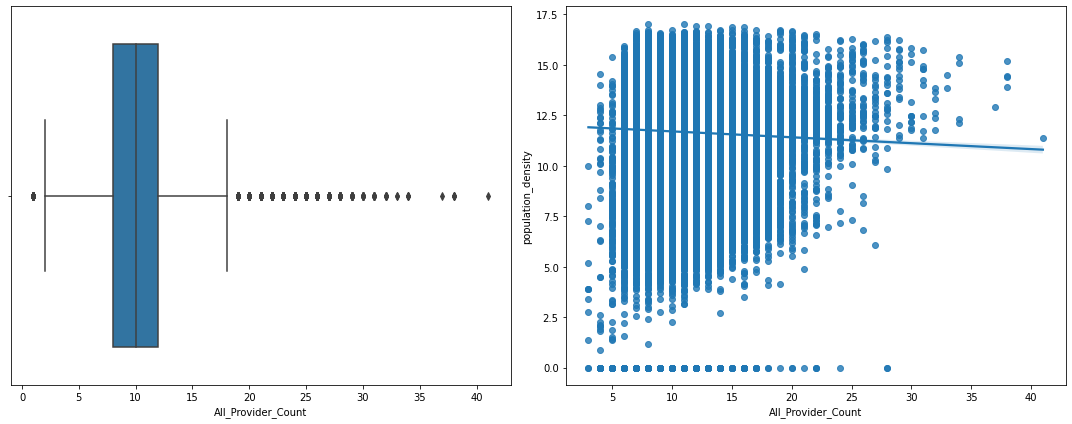

In [21]:
plot_outlier(df_broadband['All_Provider_Count'],df_broadband['population_density'])


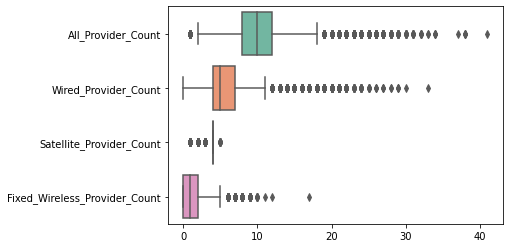

In [22]:
df_2 = df_broadband[['All_Provider_Count', 'Wired_Provider_Count',
       'Satellite_Provider_Count', 'Fixed_Wireless_Provider_Count' ]]


ax = sns.boxplot(data=df_2, orient="h", palette="Set2")


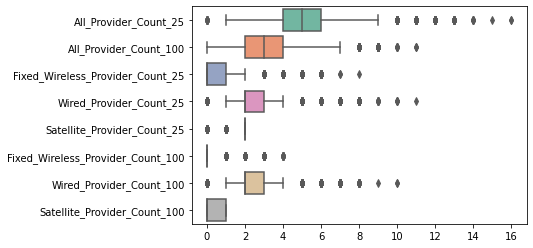

In [23]:
df_3 = df_broadband[['All_Provider_Count_25', 'All_Provider_Count_100',
       'Fixed_Wireless_Provider_Count_25', 'Wired_Provider_Count_25',
       'Satellite_Provider_Count_25', 'Fixed_Wireless_Provider_Count_100',
       'Wired_Provider_Count_100', 'Satellite_Provider_Count_100' ]]


ax = sns.boxplot(data=df_3, orient="h", palette="Set2")


## Drop Missing values

In [24]:
df_broadband.shape

(73056, 66)

In [28]:
#drop missing values
df_broadband_clean = df_broadband.dropna()

In [29]:
#count new dataset
df_broadband_clean.shape

(70888, 66)

In [49]:
# setup stratified sampling based on state 
target = ['employment_rate',
       'pct_rent_burdened',
       'poverty_rate', 'pct_pop_bachelors+','pct_pop_hs+']
X = df_broadband_clean.drop(target, axis = 'columns', inplace=False)
y = df_broadband_clean[target]

In [50]:
# split into train test sets 80/20 with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True, stratify = X['state'])


In [51]:
X_train.head()

,tract_geoid,All_Provider_Count,All_Providers,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,Wired_Provider_Count_25,Satellite_Provider_Count_25,Fixed_Wireless_Provider_Count_100,Wired_Provider_Count_100,Satellite_Provider_Count_100,NAME,total_pop2,median_age_overall,median_age_male,median_age_female,state,county,tract,median_income,total_households,ave_household_size,ave_family_size,pct_health_ins_children,pct_health_ins_19_64,pct_health_ins_65+,total_population,median_house_value,pct_white,pct_hisp_latino,pct_black,pct_native,pct_asian,pct_hi_pi,pct_other_race,pct_two+_race,pct_internet,pct_internet_dial_up,pct_internet_broadband_any_type,pct_internet_cellular,pct_only_cellular,pct_internet_broadband_fiber,pct_internet_broadband_satellite,pct_internet_only_satellite,pct_internet_other,pct_internet_no_subscrp,pct_internet_none,pct_computer,pct_computer_with_dialup,pct_computer_with_broadband,pct_computer_no_internet,pct_no_computer,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,population_density
38454,29183311500,18,"{55394, 58531, 56004, 54076, 58876, 54694, 548...",11.0,4,3.0,6.0,4.0,1.0,3.0,2.0,0.0,3.0,1.0,"Census Tract 3115, St. Charles County, Missouri",1828.0,35.8,39.3,35.0,29.0,183.0,311500.0,41837.0,816.0,2.24,2.97,92.4,81.7,100.0,1828.0,14900.0,86.8,10.3,0.8,0.0,0.0,0.0,0.0,2.1,79.411765,0.735294,78.676471,59.558824,13.112745,15.563725,4.901961,0.612745,0.0,2.450980,18.137255,89.093137,0.735294,78.063725,10.294118,10.906863,29183311500,146503429,12064526,56.565,4.658,3231.680368
40567,33013034000,9,"{55394, 56004, 54694, 59023, 59349, 55574, 566...",4.0,4,1.0,6.0,4.0,0.0,4.0,2.0,0.0,3.0,1.0,"Census Tract 340, Merrimack County, New Hampshire",4722.0,44.9,43.4,46.6,33.0,13.0,34000.0,78622.0,1787.0,2.58,2.97,100.0,94.9,100.0,4722.0,234000.0,94.6,1.5,0.0,0.0,0.7,0.0,0.1,3.0,89.031897,0.000000,89.031897,78.567431,4.141018,10.464466,5.595971,0.000000,0.0,1.510912,9.457191,93.284835,0.000000,89.031897,4.252938,6.715165,33013034000,89140735,512717,34.417,0.198,13719.963971
62802,48113009105,11,"{56448, 56004, 57146, 54694, 67058, 59349, 555...",6.0,4,1.0,4.0,3.0,0.0,2.0,2.0,0.0,2.0,1.0,"Census Tract 91.05, Dallas County, Texas",3991.0,28.5,24.8,33.0,48.0,113.0,9105.0,38242.0,1066.0,3.74,4.41,79.9,52.5,89.3,3991.0,79000.0,6.6,79.6,13.1,0.0,0.0,0.0,0.7,0.0,47.936210,0.844278,47.091932,34.146341,6.660413,12.664165,2.063790,0.281426,0.0,4.784240,47.279550,63.602251,0.844278,46.435272,16.322702,36.397749,48113009105,1394850,0,0.539,0.000,740445.269017
43990,36029006302,10,"{54788, 56004, 54694, 56843, 54895, 53905, 550...",5.0,4,1.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,"Census Tract 63.02, Erie County, New York",2576.0,43.9,46.4,39.1,36.0,29.0,6302.0,82156.0,1125.0,2.21,2.82,100.0,94.7,100.0,2576.0,405100.0,77.8,3.8,10.7,0.5,5.4,0.0,0.5,1.2,91.733333,0.000000,91.733333,80.266667,8.888889,11.466667,2.666667,0.000000,0.0,4.533333,3.733333,95.022222,0.000000,91.733333,3.288889,4.977778,36029006302,1050554,0,0.406,0.000,634482.758621
32596,25027731102,8,"{56004, 54694, 56847, 55027, 59349, 53788, 552...",4.0,4,0.0,3.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,"Census Tract 7311.02, Worcester County, Massac...",2233.0,41.3,38.9,43.9,25.0,27.0,731102.0,57475.0,1033.0,2.16,2.87,84.9,91.2,100.0,2233.0,233700.0,79.6,6.0,12.7,0.0,0.6,0.0,0.0,1.1,88.092933,0.000000,88.092933,63.213940,5.905131,24.878993,1.742498,0.000000,0.0,6.485963,5.421104,93.804453,0.000000,87.318490,6.485963,6.195547,25027731102,893827,0,0.345,0.000,647246.376812


In [54]:
y_train.head()

,employment_rate,pct_rent_burdened,poverty_rate,pct_pop_bachelors+,pct_pop_hs+
38454,68.4,47.2,21.553611,11.647510,46.896552
40567,63.6,39.4,3.794449,32.486284,64.799307
62802,54.3,70.6,29.466299,1.963470,24.931507
43990,65.9,35.4,12.765957,59.960258,83.705912
32596,64.8,52.8,15.091805,41.452258,73.870783


In [40]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

## because we haven't decided on the target variables yet, lets try not seperate out the target variables out
##  from the training and testing sets

In [59]:
## Split training and test
## based on 80/20 split and with stratification based on state

training_df, test_df = train_test_split(df_broadband_clean,test_size=0.20, random_state=1, shuffle=True, stratify = df_broadband_clean['state'])


In [60]:

training_df.shape

(56710, 66)

In [61]:
test_df.shape

(14178, 66)

In [73]:
pd.DataFrame({'Percentage': df_broadband_clean.groupby(('state')).size() / len(df_broadband_clean)*100})

,Percentage
state,
1.0,1.639206
2.0,0.225708
4.0,2.063819
5.0,0.959260
6.0,11.013148
8.0,1.716793
9.0,1.149701
10.0,0.296242
11.0,0.242636


In [72]:
pd.DataFrame({'Percentage': training_df.groupby(('state')).size() / len(training_df)*100})


,Percentage
state,
1.0,1.639922
2.0,0.225710
4.0,2.063128
5.0,0.959266
6.0,11.012167
8.0,1.717510
9.0,1.149709
10.0,0.296244
11.0,0.243343


In [69]:
pd.DataFrame({'Percentage': test_df.groupby(('state')).size() / len(test_df)*100})


,Percentage
state,
1.0,1.636338
2.0,0.225702
4.0,2.066582
5.0,0.959233
6.0,11.017069
8.0,1.713923
9.0,1.149669
10.0,0.296234
11.0,0.239808


In [74]:
##Export
training_df.to_csv('broadband_training.csv', index=False)
test_df.to_csv('broadband_test.csv', index=False)
